In [ ]:
!pip install "openai>=1" "langchain>=0.0.331rc2" "unstructured[all-docs]" pillow pydantic lxml pillow matplotlib chromadb tiktoken watermark

In [ ]:
!sudo apt-get install poppler-utils tesseract-ocr

In [7]:
%load_ext watermark
%watermark -a "Sudarshan Koirala" -vmp langchain,unstructured,openai

Author: Sudarshan Koirala

Python implementation: CPython
Python version       : 3.10.12
IPython version      : 7.34.0

langchain   : 0.1.9
unstructured: 0.10.19
openai      : 1.12.0

Compiler    : GCC 11.4.0
OS          : Linux
Release     : 6.1.58+
Machine     : x86_64
Processor   : x86_64
CPU cores   : 2
Architecture: 64bit



# Data Loading
Partition PDF tables, text, and images

In [8]:
import urllib.request

url = "https://sgp.fas.org/crs/misc/IF10244.pdf"
filename = "wildfire_stats.pdf"
urllib.request.urlretrieve(url, filename)

('wildfire_stats.pdf', <http.client.HTTPMessage at 0x7a0e80ab8ca0>)

In [9]:
path = "/content/"


In [10]:
from unstructured.partition.pdf import partition_pdf
# Extract images, tables, and chunk text
raw_pdf_elements = partition_pdf(
    filename=path + "publication247fr.pdf",
    extract_images_in_pdf=True,
    infer_table_structure=True,
    chunking_strategy="by_title",
    max_characters=4000,
    new_after_n_chars=3800,
    combine_text_under_n_chars=2000,
    image_output_dir_path=path,
)

config.json:   0%|          | 0.00/1.47k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/115M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/46.8M [00:00<?, ?B/s]

Some weights of the model checkpoint at microsoft/table-transformer-structure-recognition were not used when initializing TableTransformerForObjectDetection: ['model.backbone.conv_encoder.model.layer2.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer3.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer4.0.downsample.1.num_batches_tracked']
- This IS expected if you are initializing TableTransformerForObjectDetection from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TableTransformerForObjectDetection from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [12]:
# Categorize by type
tables = []
texts = []
for element in raw_pdf_elements:
    if "unstructured.documents.elements.Table" in str(type(element)):
        tables.append(str(element))
    elif "unstructured.documents.elements.CompositeElement" in str(type(element)):
        texts.append(str(element))

In [13]:
len(tables), len(texts)

(40, 61)

In [14]:
tables[0]

'Rapport d’activité 2 Comptes consolidés résumés semestriels 10 Tableau de variation de la trésorerie consolidée 12 Tableaux de variation des capitaux propres consolidés 13 Annexe aux comptes consolidés résumés semestriels 14 Attestation du responsable du rapport semestriel 29 Rapport des commissaires aux comptes sur |’information financiére semestrielle 30'

In [15]:
texts[0]

'Bolloré'

In [21]:
import io
import os
import base64
import numpy as np
from PIL import Image
from langchain.chat_models import ChatOpenAI
from langchain.schema.messages import HumanMessage, SystemMessage

def encode_image(image_path):
    ''' Getting the base64 string '''
    with open(image_path, "rb") as image_file:
        return base64.b64encode(image_file.read()).decode('utf-8')

# Store base64 encoded images
img_base64_list = []

# Store image summaries
image_summaries = []

# Prompt
prompt = "Describe the image in detail. Be specific about graphs, such as bar plots."

# Read images, encode to base64 strings
for img_file in sorted(os.listdir(path)):
    if img_file.endswith('.jpg'):
        img_path = os.path.join(path, img_file)
        base64_image = encode_image(img_path)
        img_base64_list.append(base64_image)
        #image_summaries.append(image_summarize(base64_image,prompt))

In [22]:
len(img_base64_list)

1


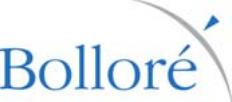

In [23]:
from IPython.display import display, HTML

def plt_img_base64(img_base64):

    # Create an HTML img tag with the base64 string as the source
    image_html = f'<img src="data:image/jpeg;base64,{img_base64}" />'

    # Display the image by rendering the HTML
    display(HTML(image_html))

plt_img_base64(img_base64_list[0])

In [24]:
from unstructured.partition.pdf import partition_pdf
# Extract images, tables, and chunk text
raw_pdf_elements = partition_pdf(
    filename=path + "getty.pdf",
    extract_images_in_pdf=True,
    infer_table_structure=True,
    chunking_strategy="by_title",
    max_characters=4000,
    new_after_n_chars=3800,
    combine_text_under_n_chars=2000,
    image_output_dir_path=path,
)
# Categorize by type
tables = []
texts = []
for element in raw_pdf_elements:
    if "unstructured.documents.elements.Table" in str(type(element)):
        tables.append(str(element))
    elif "unstructured.documents.elements.CompositeElement" in str(type(element)):
        texts.append(str(element))
len(tables), len(texts)

(2, 195)

In [25]:
tables[0], texts[0]

('1-21 Italian Renaissance and Baroque Paintings of the 14th-17th centuries DADDI, GENTILE, MASACCIO, VIVARINL, CARPACCIO, MASTER OF THE LATHROP TONDO, RAPHAEL, FERRARI, BACCHIACCA, VERONESE, LOTTO, LANFRANCO, CASTIGLIONE, DOLCI, ROSA, RICCI, CANALETTO, MAGNASCO 22-40 Dutch and Flemish Paintings of the 15th-17th centuries VAN DER WEYDEN, MASTER OF THE ST. BARTHOLOMEW ALTAR, MASTER OF THE PARLEMENT DE PARIS, VAN ORLEY, MOR, VAN DYCK, HONTHORST, ELIASZ., KALF, CLAESZ., LOEVENSZ., REMBRANDT, GELDER, BERCHEM, STEEN, SWEERTS 41-51 French and English Paintings of the 17th-19th centuries DE LA TOUR, POUSSIN, VOUET, LARGILLIERE, NATTIER, AVED,',
 'MASTERPIECES-OF PAINTING ~INTHE 4J.PAUL GETTY |‘MUSEUM')

In [26]:
import io
import os
import base64
import numpy as np
from PIL import Image
from langchain.chat_models import ChatOpenAI
from langchain.schema.messages import HumanMessage, SystemMessage

def encode_image(image_path):
    ''' Getting the base64 string '''
    with open(image_path, "rb") as image_file:
        return base64.b64encode(image_file.read()).decode('utf-8')

# Store base64 encoded images
img_base64_list = []

# Prompt
prompt = "Describe the image in detail. Be specific about graphs, such as bar plots."

# Read images, encode to base64 strings
for img_file in sorted(os.listdir(path)):
    if img_file.endswith('.jpg'):
        img_path = os.path.join(path, img_file)
        base64_image = encode_image(img_path)
        img_base64_list.append(base64_image)
        #image_summaries.append(image_summarize(base64_image,prompt))

In [30]:
len(img_base64_list)

129

In [27]:
img_base64_list[1]

'/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBwcJCQgKDBQNDAsLDBkSEw8UHRofHh0aHBwgJC4nICIsIxwcKDcpLDAxNDQ0Hyc5PTgyPC4zNDL/2wBDAQkJCQwLDBgNDRgyIRwhMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjL/wAARCAAjAcADASIAAhEBAxEB/8QAHwAAAQUBAQEBAQEAAAAAAAAAAAECAwQFBgcICQoL/8QAtRAAAgEDAwIEAwUFBAQAAAF9AQIDAAQRBRIhMUEGE1FhByJxFDKBkaEII0KxwRVS0fAkM2JyggkKFhcYGRolJicoKSo0NTY3ODk6Q0RFRkdISUpTVFVWV1hZWmNkZWZnaGlqc3R1dnd4eXqDhIWGh4iJipKTlJWWl5iZmqKjpKWmp6ipqrKztLW2t7i5usLDxMXGx8jJytLT1NXW19jZ2uHi4+Tl5ufo6erx8vP09fb3+Pn6/8QAHwEAAwEBAQEBAQEBAQAAAAAAAAECAwQFBgcICQoL/8QAtREAAgECBAQDBAcFBAQAAQJ3AAECAxEEBSExBhJBUQdhcRMiMoEIFEKRobHBCSMzUvAVYnLRChYkNOEl8RcYGRomJygpKjU2Nzg5OkNERUZHSElKU1RVVldYWVpjZGVmZ2hpanN0dXZ3eHl6goOEhYaHiImKkpOUlZaXmJmaoqOkpaanqKmqsrO0tba3uLm6wsPExcbHyMnK0tPU1dbX2Nna4uPk5ebn6Onq8vP09fb3+Pn6/9oADAMBAAIRAxEAPwD2XxPNqA02Oz0i5+y6jfTrbwXJhEiw8F3cg8HCI+AeC20ZGc1wPj+68WeHF8P6dovi++n1nV71bZBdWtp5QXHzvhYdwALIc84Gc9q9Yrycoviv9oY7rhms/DNgCsQfKGd+px0Bw4yR3jUHpQB0eq2HiTTdV8Pix8UandRXOpL


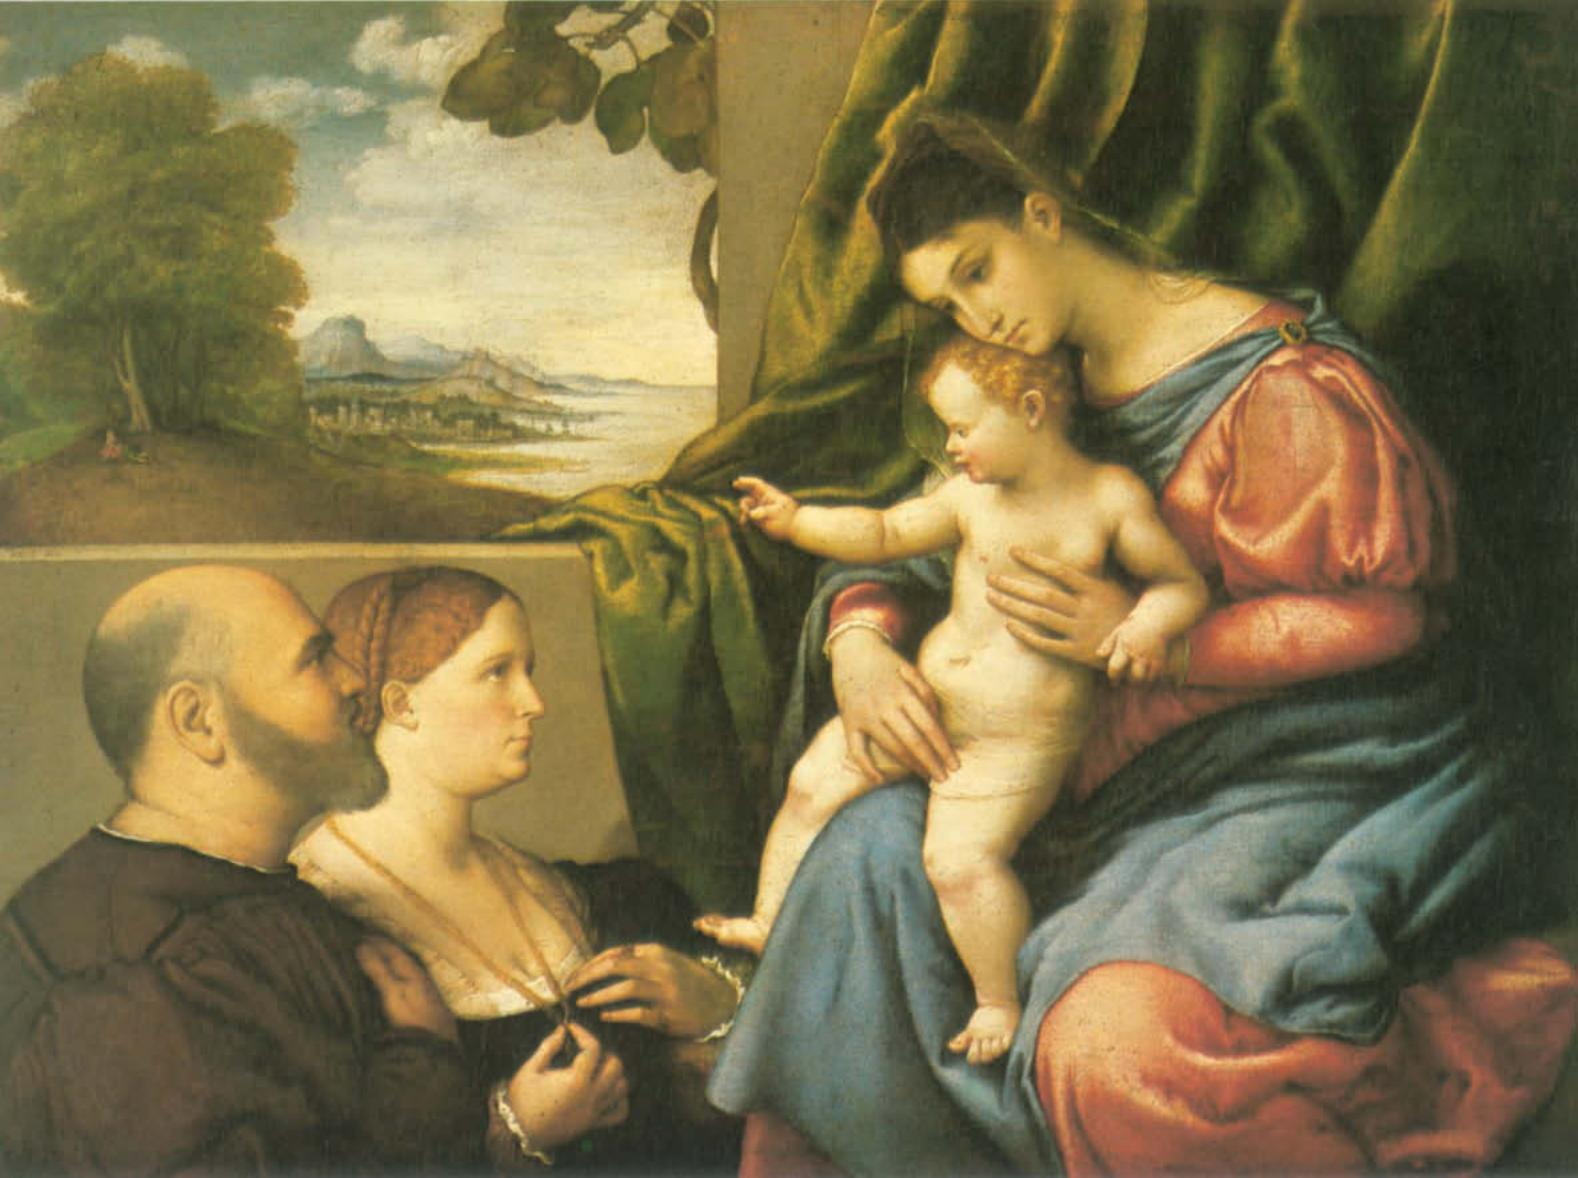

In [32]:
from IPython.display import display, HTML

def plt_img_base64(img_base64):

    # Create an HTML img tag with the base64 string as the source
    image_html = f'<img src="data:image/jpeg;base64,{img_base64}" />'

    # Display the image by rendering the HTML
    display(HTML(image_html))

plt_img_base64(img_base64_list[55])

Image = ChatOpenAI(model="gpt-4-vision-preview", max_tokens=1024)
text = ChatOpenAI(temperature=0, model="gpt-4")
See : https://github.com/sudarshan-koirala/youtube-stuffs/blob/main/langchain/LangChain_Multi_modal_RAG.ipynb
